In [22]:
import ConstitutiveRelationships as CR
from baseUnits import ksi, MPa, kgf, kN, N, tf, mm, cm, m
import matplotlib.pyplot as plt
import numpy as np


<Axes: xlabel='Strain', ylabel='Stress'>

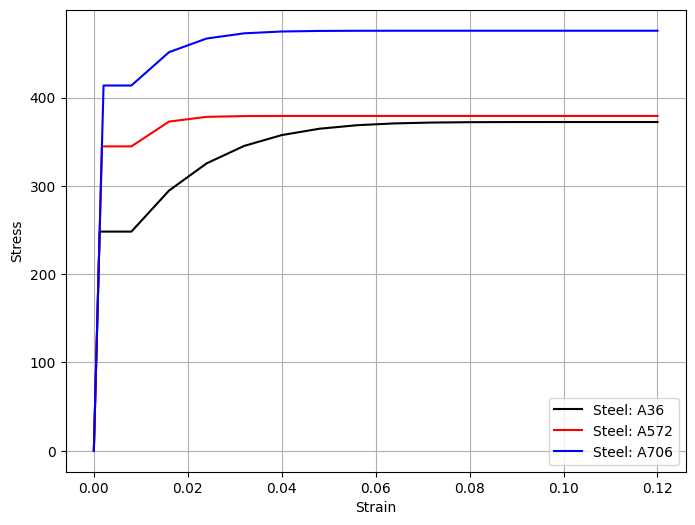

In [23]:
A36=CR.UniaxialBilinealSteel(
    name='A36',
    fy=36*ksi,
    fsu=1.5*36*ksi,
)

A572=CR.UniaxialBilinealSteel(
    name='A572',
    fy=50*ksi,
    fsu=1.1*50*ksi,
)

A706=CR.UniaxialBilinealSteel(
    name='A706',
    fy=60*ksi,
    fsu=1.15*60*ksi,
)

fig, ax = plt.subplots(figsize=(8,6))

ax.grid(True)

A36.plot(ax=ax, color='k')
A572.plot(ax=ax, color='r')
A706.plot(ax=ax, color='b')


[INFO] Excel exported successfully: c:\Users\nmora\Documents\GitHub\ConstitutiveRelationships\ConstitutiveRelationships\Ejemplos\fc240_UC_law.xlsx
[INFO] CSV exported successfully: c:\Users\nmora\Documents\GitHub\ConstitutiveRelationships\ConstitutiveRelationships\Ejemplos\fc240_UC_law.csv


<Axes: xlabel='Strain', ylabel='Stress'>

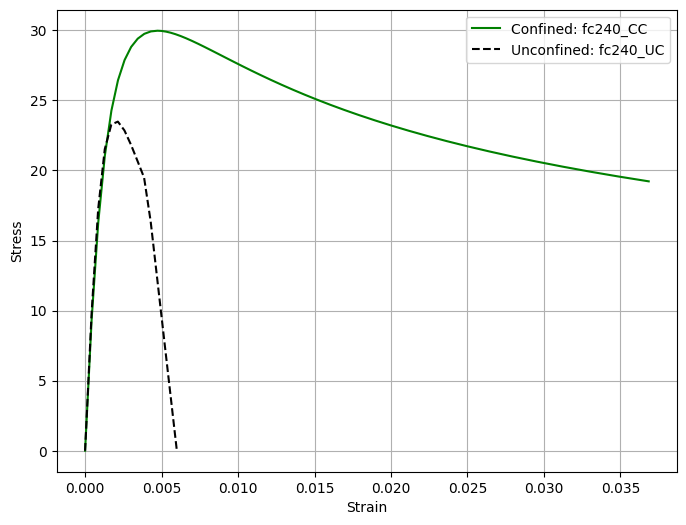

In [ ]:
fc240_UC=CR.UniaxialUnconfinedConcrete(
    name='fc240_UC',
    fco=240*kgf/cm**2
)

fc240_CC=CR.UniaxialConfinedConcrete(
    name='fc240_CC',
    fco=240*kgf/cm**2,
    eco=0.002,
    b=300*mm,
    h=500*mm,
    rec=30*mm,
    num_var_b=3,
    num_var_h=5,
    phi_longitudinal=16*mm,
    num_est_perpendicular_b=2,
    num_est_perpendicular_h=2,
    phi_estribo=10*mm,
    fye=420*MPa,
    esu_estribo=0.10,
    s=100*mm,
)

fig, ax = plt.subplots(figsize=(8,6))
ax.grid(True)
fc240_CC.plot(ax=ax, color='g')
fc240_UC.plot(ax=ax, color='k', linestyle='--')

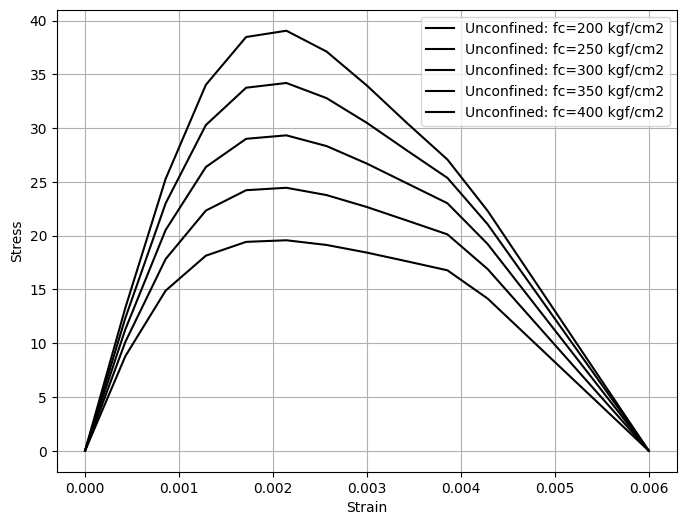

In [29]:
fc_array=np.linspace(200*kgf/cm**2, 400*kgf/cm**2, 5)
fc_objects=[]

for fc in fc_array:
    concrete=CR.UniaxialUnconfinedConcrete(name=f'fc={fc/ (kgf/cm**2):.0f} kgf/cm2', fco=fc)
    fc_objects.append(concrete)

fig, ax = plt.subplots(figsize=(8,6))
ax.grid(True)
for concrete in fc_objects:
    concrete.plot(ax=ax)

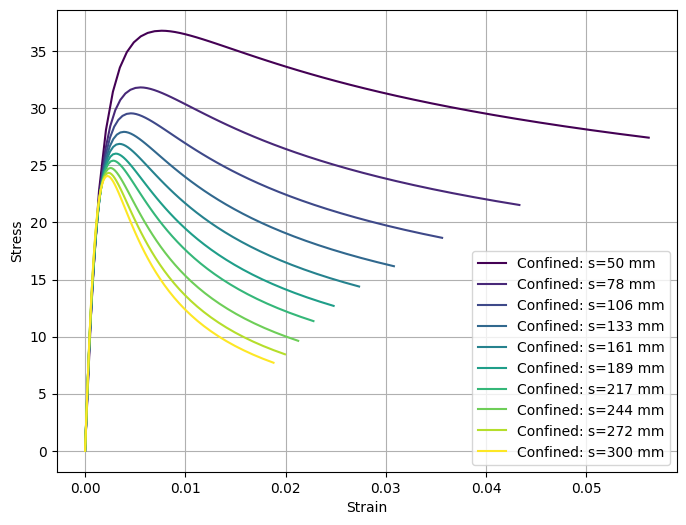

In [32]:
s_array=np.linspace(50*mm, 300*mm, 10)
s_objects=[]
color_array=plt.cm.viridis(np.linspace(0,1,len(s_array)))

for s in s_array:
    concrete=CR.UniaxialConfinedConcrete(
        name=f's={s/ mm:.0f} mm',
        fco=240*kgf/cm**2,
        eco=0.002,
        b=300*mm,
        h=500*mm,
        rec=30*mm,
        num_var_b=3,
        num_var_h=5,
        phi_longitudinal=16*mm,
        num_est_perpendicular_b=2,
        num_est_perpendicular_h=2,
        phi_estribo=10*mm,
        fye=420*MPa,
        esu_estribo=0.10,
        s=s,
        color=color_array[np.where(s_array==s)[0][0]],
    )
    s_objects.append(concrete)
    
fig, ax = plt.subplots(figsize=(8,6))
ax.grid(True)
for concrete in s_objects:
    concrete.plot(ax=ax)


(<Axes: xlabel='Smallest confining stress ratio  fl1/fco', ylabel='Confined strength ratio  fcc/fco'>,
 <Axes: xlabel='Largest confining stress ratio  fl2/fco', ylabel='Confined strength ratio  fcc/fco'>)

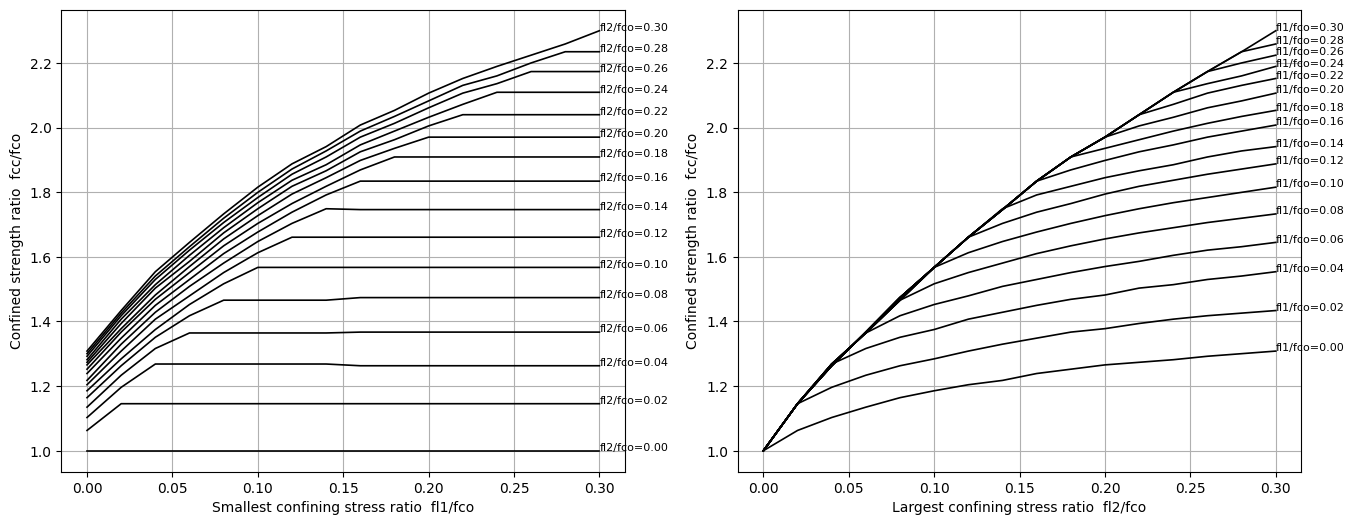

In [38]:
fc240_CC.plot_multiaxial_strength_2d()